# Save and load results as HDF5 files

In [1]:
import pypesto
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pypesto.storage import (save_to_hdf5, read_from_hdf5)
import tempfile

%matplotlib inline

## Define the objective and problem

In [2]:
# first type of objective
objective = pypesto.Objective(fun=sp.optimize.rosen, 
                               grad=sp.optimize.rosen_der, 
                               hess=sp.optimize.rosen_hess)


dim_full = 10
lb = -5 * np.ones((dim_full, 1))
ub = 5 * np.ones((dim_full, 1))

problem = pypesto.Problem(objective=objective, lb=lb, ub=ub)

## Run optimization

In [3]:
# create optimizers
optimizer = pypesto.ScipyOptimizer(method='l-bfgs-b')

# set number of starts
n_starts = 20

# Run optimizaitons for different optimzers
result = pypesto.minimize(
    problem=problem, optimizer=optimizer,
    n_starts=n_starts)

In [4]:
result.optimize_result.list

[{'id': '2',
  'x': array([0.99999999, 1.00000003, 1.00000001, 1.00000001, 1.00000004,
         1.00000001, 1.0000001 , 1.00000018, 1.00000036, 1.00000072]),
  'fval': 1.7658312639295734e-12,
  'grad': array([-1.89249491e-05,  2.73564506e-05, -2.14583068e-06, -1.14359774e-05,
          3.14407236e-05, -4.44635436e-05,  2.16113639e-05, -1.93425446e-06,
          4.73509249e-06, -2.17809739e-06]),
  'hess': None,
  'res': None,
  'sres': None,
  'n_fval': 90,
  'n_grad': 90,
  'n_hess': 0,
  'n_res': 0,
  'n_sres': 0,
  'x0': array([0.99999999, 1.00000003, 1.00000001, 1.00000001, 1.00000004,
         1.00000001, 1.0000001 , 1.00000018, 1.00000036, 1.00000072]),
  'fval0': 123388.01172718631,
  'trace': None,
  'exitflag': 0,
  'time': 0.017609596252441406,
  'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'},
 {'id': '5',
  'x': array([0.99999994, 0.99999996, 1.00000001, 1.        , 0.99999996,
         0.99999988, 0.99999981, 0.99999968, 0.99999934, 0.9999986 ]),
  'fval': 3

## Plot results

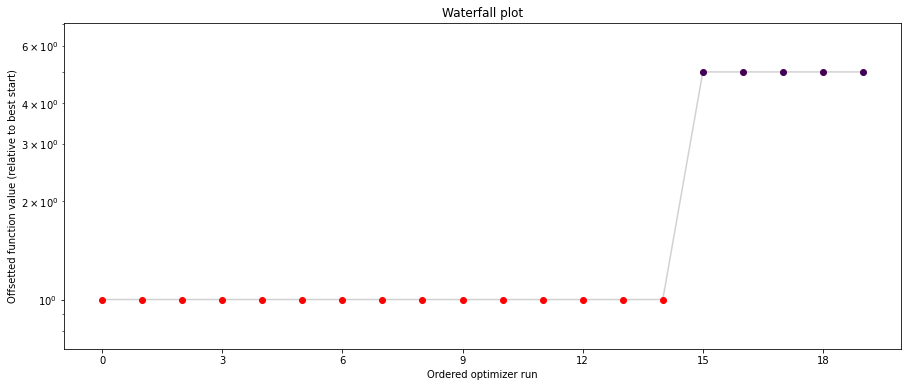

In [5]:
import pypesto.visualize

# plot waterfalls
pypesto.visualize.waterfall(result, size=(15,6))

## Save optimization result as HDF5 file

In [6]:
fn = tempfile.mktemp(".hdf5")

hdf5_writer = save_to_hdf5.OptimizationResultHDF5Writer(fn)
hdf5_writer.write(result)

In [7]:
hdf5_reader = read_from_hdf5.OptimizationResultHDF5Reader(fn)
result = hdf5_reader.read()

In [8]:
result.optimize_result.list

[{'id': '2',
  'x': array([0.99999999, 1.00000003, 1.00000001, 1.00000001, 1.00000004,
         1.00000001, 1.0000001 , 1.00000018, 1.00000036, 1.00000072]),
  'fval': 1.7658312639295734e-12,
  'grad': array([-1.89249491e-05,  2.73564506e-05, -2.14583068e-06, -1.14359774e-05,
          3.14407236e-05, -4.44635436e-05,  2.16113639e-05, -1.93425446e-06,
          4.73509249e-06, -2.17809739e-06]),
  'hess': None,
  'res': None,
  'sres': None,
  'n_fval': 90,
  'n_grad': 90,
  'n_hess': 0,
  'n_res': 0,
  'n_sres': 0,
  'x0': array([0.99999999, 1.00000003, 1.00000001, 1.00000001, 1.00000004,
         1.00000001, 1.0000001 , 1.00000018, 1.00000036, 1.00000072]),
  'fval0': 123388.01172718631,
  'trace': None,
  'exitflag': 0,
  'time': 0.017609596252441406,
  'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'},
 {'id': '5',
  'x': array([0.99999994, 0.99999996, 1.00000001, 1.        , 0.99999996,
         0.99999988, 0.99999981, 0.99999968, 0.99999934, 0.9999986 ]),
  'fval': 3

## Plot results

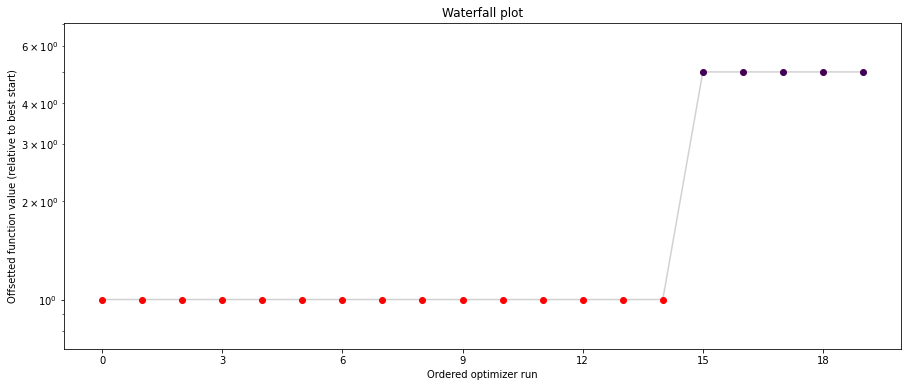

In [9]:
# plot waterfalls
pypesto.visualize.waterfall(result, size=(15,6))